<a href="https://colab.research.google.com/github/agilakbarmm/natural_language_processing/blob/main/ngrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum Model Bahasa n-grams

## Persiapan

Download NLTK dan modul untuk punctuation (punkt)</br>
Jalankan kode di bawah ini dan masukkan informasi yang ditandai dengan warna kuning seperti di gambar
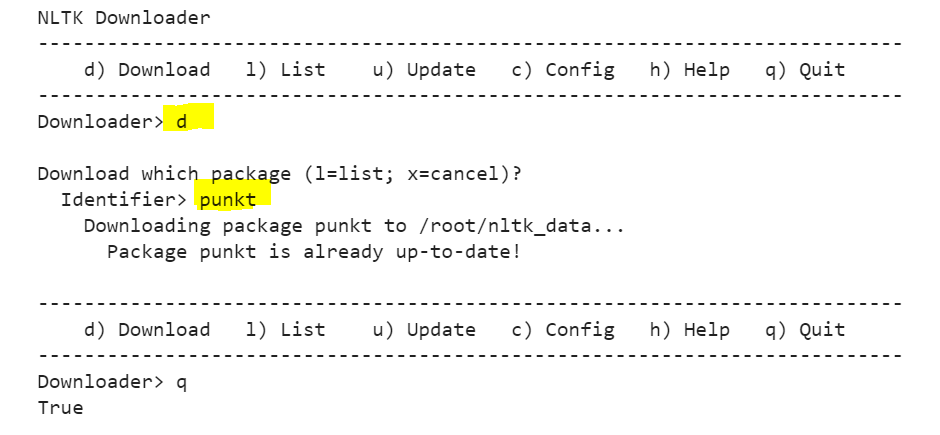

In [ ]:
# !pip install nltk

import nltk
# nltk.download() # untuk menampilkan downloader

# download modul punctuation punkt
nltk.download('punkt')

In [ ]:
#import modul lain yang dibutuhkan
from nltk.util import ngrams
from nltk.probability import FreqDist, ConditionalFreqDist
from google.colab import files

Upload file yang ingin diproses

In [ ]:
#mengupload file tertentu
files.upload()

Setelah diupload, file bisa dilihat pada working directorynya. Bisa diakses melalui simbol folder di sebelah kiri <----

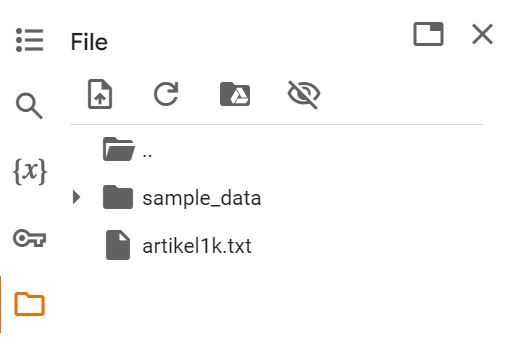

## Proses Pembuatan n-grams

### Loading dan Cleaning Teks

In [ ]:
from bs4 import BeautifulSoup as BS
with open('artikel1k.txt', 'r') as berkas:
    artikel = berkas.read()

soup = BS(artikel, 'html.parser')

alltext = soup.find_all("div", {"class": "detail_text"})
text = " ".join([x.get_text() for x in alltext])

cleaned_text = text.replace("\n", " ").replace("\t", " ").replace(".", ". ")


### Tokenizing

In [ ]:
#eksperimen
nltk.sent_tokenize(text)

In [ ]:
#eksperimen
nltk.word_tokenize(text)

In [ ]:
sentences = nltk.sent_tokenize(cleaned_text) # parsing text menjadi kalimat
token = []
alltoken = []
for sentence in sentences:
    t = nltk.word_tokenize(sentence)
    token.append(t) # parsing kalimat menjadi token atau kata dan menambahkannya ke daftar token
    alltoken.extend(t) # list dari semua token (menembus batas kalimat)
token

In [ ]:
alltoken

### Penyusunan Bigram

In [ ]:
#eksperimen
bigram = ngrams(alltoken,2)
bigram_fd = FreqDist(bigram)

bigram_fd[("Jawa","Timur")]

Membuat model unigram, bigram, dan trigram

In [ ]:
# Model unigram
listunigram = []
for tk in token:
  unigram = ngrams(tk, 1, pad_right=True, pad_left=True, left_pad_symbol='<s>', right_pad_symbol='</s>')
  for gram in unigram:
    listunigram.append(gram)

unigram_fd = FreqDist(listunigram)

In [ ]:
# Model bigram
listbigram = []
for tk in token:
  bigram = ngrams(tk, 2, pad_right=True, pad_left=True, left_pad_symbol='<s>', right_pad_symbol='</s>')
  for gram in bigram:
    listbigram.append(gram)

bigram_fd = FreqDist(listbigram)

In [ ]:
# Model trigram
listtrigram = []
for tk in token:
  trigram = ngrams(tk, 3, pad_right=True, pad_left=True, left_pad_symbol='<s>', right_pad_symbol='</s>')
  for gram in trigram:
    listtrigram.append(gram)

trigram_fd = FreqDist(listtrigram)

In [ ]:
unigram_fd

### Penyimpanan File

Simpan distribusi frekuensi dari unigram, bigram, dan trigram ke dalam file

In [ ]:
with open("bigram.txt","w") as f:
  for token in bigram_fd:
    f.write("{}\t{}\n".format(token,bigram_fd[token]))

In [ ]:
#alternatif kode untuk menyimpan ke file txt
# f = open("bigram.txt","w")

# for token in bigram_fd:
#   f.write("{}\t{}\n".format(token,bigram_fd[token]))

# f.close()

In [ ]:
# Menyimpan data bigram kedalam pickle
import pickle
with open('bigram_fr.pkl', 'wb') as f:
    pickle.dump(bigram_fd, f)

In [ ]:
#download file bigram yang sudah disimpan
files.download("bigram.txt")

## Implementasi Model

* Membandingkan dua kalimat yang paling benar berdasarkan probabilitasnya
* Prediksi kata berdasarkan probabilitas kata sebelumnya
* Membuat kalimat yang mendekati bahasa tersebut

### Membandingkan dua kalimat yang paling benar berdasarkan probabilitasnya

In [ ]:
kal1 = "Saya minta itu dicopot untuk pidato budaya"
kal2 = "Saya minta itu untuk pidato budaya."

In [ ]:
# function untuk menghitung probabilitas kalimat
def search_sentence_prob(sentence, model):
  token_test = nltk.word_tokenize(sentence)
  p = 1
  for kata in token_test:
    pkata = model.freq((kata,))
    print("p('%s') \t= %f"%(kata, pkata))
    p=p*pkata
  print("p(%s) \t="%(sentence),p)
  print()
  return p

In [ ]:
search_sentence_prob(kal1, unigram_fd)

In [ ]:
search_sentence_prob(kal2, unigram_fd)

### Prediksi kata berdasarkan probabilitas kata sebelumnya

In [ ]:
def predict_word_trigram(sentence, trigram_fr):
    tokens = nltk.word_tokenize(sentence.lower())

    context = tuple(tokens[-2:])
    candidates = {trigram[2]: freq for trigram, freq in trigram_fr.items() if trigram[:2] == context}

    total_freq = sum(candidates.values())

    predictions = [f"Kata: {word}, \tPeluang: {freq / total_freq:.2f}" for word, freq in candidates.items()]

    return "\n".join(predictions)

In [ ]:
kalimat = "hari ini saya akan"
predictions = predict_word_trigram(kalimat, trigram_fd)

print("Prediksi Kata:")
print(predictions)

### Membuat kalimat yang mendekati bahasa tersebut

In [ ]:
bigram_cfd = ConditionalFreqDist(listbigram)

In [ ]:
import random

def generate(batas):
  kalimat = []
  kata = "<s>"
  selesai = False
  while not selesai:
    r = random.random()
    acc =.0
    for key in bigram_cfd[kata]:
      acc += bigram_cfd[kata].freq(key)
      if(acc>=r):
        kata = key
        kalimat.append(kata)
        batas -= 1
        break
    if(kata=="</s>"):
      kalimat = kalimat[:-1]
      selesai = True
    if(batas <= 0):
      selesai = True
  return (' '.join(kalimat))

In [ ]:
generate(11)

# Praktikum Menggunakan Pantun

pantun yang dikumpulkan dari tugas pekan lalu dapat didownload di Elena. silahkan buka file tersebut dengan python dan dihitung distribusi frekuensi unigram, bigram, dan trigramnya.

Sebelum dihitung frekuensinya, sebaiknya dilakukan preprosesing terlebih dahulu :


*   Hapus simbol simbol selain alfabet
*   Ubah semua huruf menjadi huruf kecil
*   Berikan padding di kiri dan kanan tiap baris



In [ ]:
import nltk
from nltk.util import ngrams
from nltk.probability import FreqDist, ConditionalFreqDist
from google.colab import files

nltk.download('punkt')

In [ ]:
files.upload()

In [ ]:
kalimat = open("pantun.txt","r").readlines()
kalimat = [line[:-1] for line in kalimat]
kalimat[:10]

In [ ]:
pantun = open("pantun.txt","r")

kalimat = []
for teks in iter(lambda: pantun.readline(),""):
  if(teks!="\n"):
    kalimat.append(teks[:-1])

In [ ]:
kalimat[:10]

In [ ]:
import re

for i,teks in enumerate(kalimat):
  kalimat[i] = re.sub(r"[^\w ]"," ", teks)

In [ ]:
listbigram = []

for k in kalimat:
  #bisa pakai fungsi split atau nltk.word_tokenize untuk membagi kalimat ke kata/token
  #bigram = ngrams(nltk.word_tokenize(k.lower()),2,pad_right=True,pad_left=True,left_pad_symbol="<s>",right_pad_symbol="</s>")
  bigram = ngrams(k.lower().split(),2,pad_right=True,pad_left=True,left_pad_symbol="<s>",right_pad_symbol="</s>")
  for g in bigram:
    listbigram.append(g)

bigram_cfd = ConditionalFreqDist(listbigram)

In [ ]:
bigram_cfd["jalan"]

In [ ]:
for i in bigram_cfd:
  print(i)

In [ ]:
bigram_cfd["dalam"]

In [ ]:
listtrigram = []

for k in kalimat:
  #bisa pakai fungsi split atau nltk.word_tokenize untuk membagi kalimat ke kata/token
  trigram = ngrams(k.lower().split(),3,pad_right=True,pad_left=True,left_pad_symbol="<s>",right_pad_symbol="</s>")
  for g in trigram:
    listtrigram.append(g)

trigram_fd = FreqDist(listtrigram)

In [ ]:
trigram_fd

## Generating
Dari data bigram_cfd, kita bisa membuat kalimat secara random yang mengikuti gaya dari corpusnya.

In [ ]:
import random

def generate(batas):
  kalimat = []
  kata = "<s>"
  selesai = False
  while not selesai:
    r = random.random()
    acc =.0
    for key in bigram_cfd[kata]:
      acc += bigram_cfd[kata].freq(key)
      if(acc>=r):
        kata = key
        kalimat.append(kata)
        batas -= 1
        break
    if(kata=="</s>"):
      kalimat = kalimat[:-1]
      selesai = True
    if(batas <= 0):
      selesai = True
  return (' '.join(kalimat))

In [ ]:
generate(10)

In [ ]:
apakah harus banyak jasa ibu bapak sedang bingung
jikalau kita menambah pengalaman
tuk obati semangat
banyak jasa disebut orang ganteng wajahnya manis